# Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
import re
from skimage import io
from skimage import color
import pandas as pd

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Development or AWS switch

In [2]:
usingAWS = True

# Assign Data Directories
if usingAWS == True:
    # AWS directory
    train_directory = '../simpsons_train_scaled'
    test_directory = '../simpsons_test_scaled'
else:
    # Local directory
    train_directory = '/media/sf_Gee_Hard_Drive/Kaggle Data/the-simpsons-characters-dataset/simpsons_train_scaled'
    test_directory = '/media/sf_Gee_Hard_Drive/Kaggle Data/the-simpsons-characters-dataset/simpsons_test_scaled'

# Get Train Images & Assign Id

In [3]:
classes = os.listdir(train_directory)
class_indices = np.arange(len(classes))
class_dict = dict(zip(classes, class_indices))
class_dict

{'abraham_grampa_simpson': 6,
 'agnes_skinner': 2,
 'apu_nahasapeemapetilon': 43,
 'barney_gumble': 18,
 'bart_simpson': 28,
 'bumblebee_man': 1,
 'carl_carlson': 23,
 'charles_montgomery_burns': 29,
 'chief_wiggum': 36,
 'cletus_spuckler': 16,
 'comic_book_guy': 8,
 'disco_stu': 31,
 'edna_krabappel': 34,
 'fat_tony': 33,
 'gil': 22,
 'groundskeeper_willie': 10,
 'hans_moleman': 38,
 'helen_lovejoy': 7,
 'homer_simpson': 11,
 'jasper_beardly': 41,
 'jimbo_jones': 5,
 'kent_brockman': 40,
 'krusty_the_clown': 4,
 'lenny_leonard': 24,
 'lionel_hutz': 45,
 'lisa_simpson': 19,
 'maggie_simpson': 17,
 'marge_simpson': 20,
 'martin_prince': 25,
 'mayor_quimby': 39,
 'milhouse_van_houten': 14,
 'miss_hoover': 15,
 'moe_szyslak': 0,
 'ned_flanders': 30,
 'nelson_muntz': 13,
 'otto_mann': 21,
 'patty_bouvier': 12,
 'principal_skinner': 27,
 'professor_john_frink': 37,
 'rainier_wolfcastle': 35,
 'ralph_wiggum': 46,
 'selma_bouvier': 42,
 'sideshow_bob': 3,
 'sideshow_mel': 44,
 'snake_jailbird

In [4]:
totalClasses = 5
totalPicsPerClass = 5

def getDirs(main):
    classes = os.listdir(main)#[0:totalClasses]
    combo = []
    [combo.append([class_dict[clas], clas, main + '/' + clas]) for clas in classes]
    return(combo)

def getPics(directory):
    pics = os.listdir(directory)#[0:totalPicsPerClass]
    picPath = [directory + '/' + pic for pic in pics]
    return(picPath)

def readImage(imagePath):
    pix = io.imread(imagePath)
    pix = color.rgb2gray(pix)
    return(pix)

imageDirs = getDirs(train_directory)
s = list(map(lambda x: [x[0], x[1], getPics(x[2])], imageDirs))

trainPix = []
for arr in s:
    for picArray in arr[2]:
        pix = readImage(picArray)
        trainPix.append([arr[0], arr[1], pix])

In [5]:
len(trainPix)

20933

# Print out the first 10 pics

/home/gclark/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


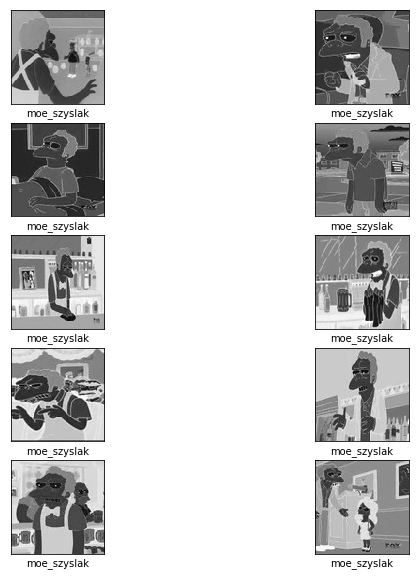

In [6]:
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(len(trainPix[0:10])):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(trainPix[i][2], cmap=plt.cm.binary)
    plt.xlabel(trainPix[i][1])

# PreProcess RGB values from 0 to 1

In [7]:
labels = list(map(lambda x: x[0], trainPix))
names = list(map(lambda x: x[1], trainPix))
images = list(map(lambda x: x[2], trainPix))
preProcessedImages = list(map(lambda x: x/255, images)) # Only needed if no gray-scaling

In [8]:
labels = np.array(labels)
names = np.array(names)
images = np.array(images)
preProcessedImages = np.array(preProcessedImages)
labels.shape, images.shape

((20933,), (20933, 100, 100))

# Variation of groups within Train Images

In [9]:
trainDF = pd.DataFrame(names, columns=["characters"])
grp = trainDF.groupby("characters").agg({"characters":"count"})
percents = grp.groupby(level=0).apply(lambda x: 100 * x / len(trainDF))
percents

,characters
characters,
abraham_grampa_simpson,4.361534
agnes_skinner,0.200640
apu_nahasapeemapetilon,2.976162
barney_gumble,0.506377
bart_simpson,6.410930
carl_carlson,0.468160
charles_montgomery_burns,5.699135
chief_wiggum,4.710266
cletus_spuckler,0.224526


# Model Construction

## Model Layers

In [10]:
model_classes = len(classes)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(100, 100)),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(model_classes, activation=tf.nn.softmax)
])

## Model Functions (optimzer, accuracy)

In [11]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit Model to training data

In [12]:
model.fit(preProcessedImages, labels, epochs=10)

Epoch 1/10
20933/20933 [==============================] - 5s 250us/step - loss: 3.1285 - acc: 0.1066
Epoch 2/10
20933/20933 [==============================] - 5s 237us/step - loss: 2.8961 - acc: 0.1700
Epoch 3/10
20933/20933 [==============================] - 5s 240us/step - loss: 2.7879 - acc: 0.2049
Epoch 4/10
20933/20933 [==============================] - 5s 245us/step - loss: 2.7382 - acc: 0.2177
Epoch 5/10
20933/20933 [==============================] - 5s 243us/step - loss: 2.6990 - acc: 0.2286
Epoch 6/10
20933/20933 [==============================] - 5s 236us/step - loss: 2.6635 - acc: 0.2426
Epoch 7/10
20933/20933 [==============================] - 5s 234us/step - loss: 2.6411 - acc: 0.2467
Epoch 8/10
20933/20933 [==============================] - 5s 235us/step - loss: 2.6170 - acc: 0.2542
Epoch 9/10
20933/20933 [==============================] - 5s 234us/step - loss: 2.5836 - acc: 0.2617
Epoch 10/10
20933/20933 [==============================] - 5s 239us/step - loss: 2.5629 - a

# Evaluate Accuracy w/ Test Set

In [13]:
# Get all test images into a similar format given the one directory they are all in
test_pics = os.listdir(test_directory)

def getClass(pic):
    if pic != '.DS_Store':
        character = re.sub('_[0-9]{1,2}.jpg$', '', pic)
        return(character)

classes = list(map(lambda x: x[1], trainPix))
classes = np.array(classes)
uClasses = np.unique(classes)
    
test = []
for pic in test_pics:
    if pic != '.DS_Store':
        path = test_directory + '/' + pic
        pix_array = io.imread(path)
        pix_array = color.rgb2gray(pix_array)
        character_label = getClass(pic)
#         if character_label == uClasses[0] or character_label == uClasses[1] or character_label == uClasses[2]:
        test.append([class_dict[character_label], character_label, pix_array])

In [14]:
len(uClasses), len(np.unique(np.array(list(map(lambda x: x[1], test)))))

(42, 20)

In [15]:
test_images = list(map(lambda x: x[2], test))
test_images = np.array(test_images)

ppTest_images = list(map(lambda x: x/255, test_images))
ppTest_images = np.array(ppTest_images)

test_labels = list(map(lambda x: x[0], test))
test_labels = np.array(test_labels)

test_names = list(map(lambda x: x[1], test))
test_names = np.array(test_names)

test_labels.shape, test_images.shape, test_names.shape

((990,), (990, 100, 100), (990,))

In [16]:
test_loss, test_acc = model.evaluate(ppTest_images, test_labels)

print('Test accuracy:', test_acc)

990/990 [==============================] - 0s 154us/step
Test accuracy: 0.25959595977657973


In [17]:
predictions = model.predict(test_images)

preds = [np.argmax(pred) for pred in predictions]

def findLabel(index):
    for key, val in class_dict.items():
        if val == index:
            return(key)
            
pred_labels = [findLabel(pred) for pred in preds]
pred_labels = np.array(pred_labels)

/home/gclark/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


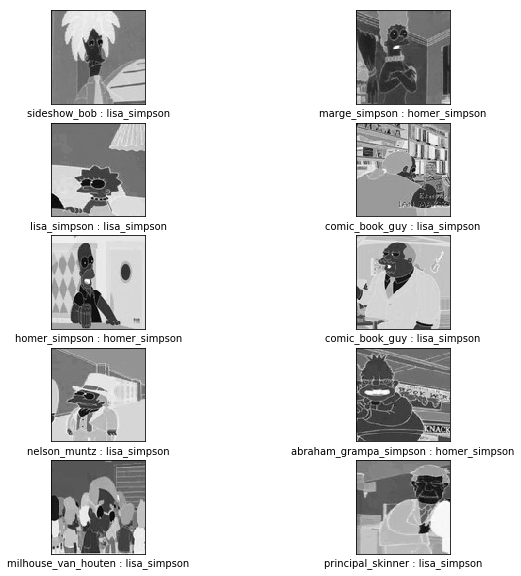

In [18]:
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(len(test_images[0:10])):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i+70], cmap=plt.cm.binary)
    plt.xlabel(test_names[i+70] + " : " + pred_labels[i+70])

# Prediction Stats

In [19]:
d = {'testLabels': test_names, 'predictions': pred_labels}
predDF = pd.DataFrame(data=d)
predDF['pred'] = predDF.apply(lambda x: x[0] == x[1], axis=1)
predDF.groupby(['testLabels']).agg({'pred': {'mean': 'mean', 'count':'count'}})

/home/gclark/.local/lib/python3.5/site-packages/pandas/core/groupby/groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


pred          
                         count      mean
testLabels                              
abraham_grampa_simpson      48  0.000000
apu_nahasapeemapetilon      50  0.000000
bart_simpson                50  0.000000
charles_montgomery_burns    48  0.000000
chief_wiggum                50  0.000000
comic_book_guy              49  0.000000
edna_krabappel              50  0.000000
homer_simpson               50  0.380000
kent_brockman               50  0.120000
krusty_the_clown            50  0.000000
lenny_leonard               50  0.000000
lisa_simpson                50  0.960000
marge_simpson               50  0.000000
mayor_quimby                50  0.000000
milhouse_van_houten         49  0.000000
moe_szyslak                 50  0.000000
ned_flanders                49  0.000000
nelson_muntz                50  0.000000
principal_skinner           50  0.000000
sideshow_bob                47  0.021277